<a href="https://colab.research.google.com/github/daikaan/Graduation_Pr/blob/main/optimization_true_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import math
import io
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import files
upload = files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


In [ ]:
col = ['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalch', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target']
data = pd.read_csv(io.BytesIO(upload['deneme1.csv']), header=0, names=col)

data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Ca,Thal,Target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#drop NA values
data.dropna(inplace = True)
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Ca,Thal,Target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#normalize the data
data = (data - data.min()) / (data.max() - data.min())

In [ ]:
data.sort_values('Target', ignore_index = True, inplace = True)
data['Target'].replace(0.0, -1, inplace = True)
data['Target'].replace(1.0, 1, inplace = True)
data.head()
#len(data)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Ca,Thal,Target
0,0.353846,0.0,0.333333,0.245283,0.360731,0.0,0.0,0.679389,0.0,0.290323,0.5,0.0,0.666667,-1.0
1,0.753846,0.0,0.000000,0.339623,0.182648,0.0,0.0,0.465649,1.0,0.387097,0.5,0.5,1.000000,-1.0
2,0.800000,0.0,0.000000,0.150943,0.093607,0.0,0.0,0.328244,1.0,0.322581,0.5,0.0,1.000000,-1.0
3,0.661538,0.0,0.000000,0.216981,0.237443,1.0,0.5,0.679389,1.0,0.225806,1.0,0.5,1.000000,-1.0
4,0.384615,0.0,0.666667,0.433962,0.477169,0.0,0.5,0.664122,0.0,0.000000,1.0,0.0,0.666667,-1.0


In [ ]:
class_1 = np.zeros(len(data[data.Target == -1]))
class1 = np.zeros(len(data[data.Target == 1]))
for i in range(int(len(class_1) * 1 / 10)):
    class_1[i] = -1
for i in range(int(len(class1) * 1 / 10)):
    class1[i] = 1
classes = np.append(class_1, class1)
with np.printoptions(threshold=np.inf):
    print(classes)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [ ]:
y_train = []
y_test = []

for el in classes:
    if el != 0:
        y_train.append(el)
        
print(len(y_train), len(y_test))

149 0


In [ ]:
class_1 = data[data.Target == 1]
class_minus_1 = data[data.Target == -1]

class_1_mean = class_1.mean()
class_minus_1_mean = class_minus_1.mean()

print(class_1_mean)
print(class_minus_1_mean)

Age         0.538406
Sex         0.357656
Cp          0.462919
Trestbps    0.335052
Chol        0.266039
Fbs         0.142344
Restecg     0.300239
Thalch      0.669656
Exang       0.138756
Oldpeak     0.095829
Slope       0.795455
Ca          0.089713
Thal        0.708134
Target      1.000000
dtype: float64
Age         0.548275
Sex         0.265152
Cp          0.155556
Trestbps    0.380217
Chol        0.286000
Fbs         0.163636
Restecg     0.222727
Thalch      0.517280
Exang       0.559091
Oldpeak     0.258773
Slope       0.578788
Ca          0.292045
Thal        0.852020
Target     -1.000000
dtype: float64


In [ ]:
b = data.iloc[:, -1]
a = data.iloc[:,:-1]
x = a.to_numpy().tolist()
y = b.to_numpy().tolist()
X_train = []
X_test = []
for i in range(len(classes)):
    if classes[i] != 0:
        X_train.append(x[i])
    else:
        X_test.append(x[i])
        y_test.append(y[i])

print(len(X_train), len(X_test))

149 1347


In [ ]:
def euclidean_dist(x , y):
    return np.sqrt(np.sum(np.square(np.subtract(x, y))))

In [ ]:
def find_class(i):
    min_d = 20.0
    c = 1
    for j in range(len(X_train)):
        if (euclidean_dist(X_train[j], X_test[i]) < min_d):
            min_d = euclidean_dist(X_train[j], X_test[i])
            c = y_train[j]
    return c

In [ ]:
y_knn = []
for i in range(len(X_test)):
    c = find_class(i)
    y_knn.append(c)

In [ ]:
len(y_knn)

1347

In [ ]:
count = 0
for i in range(len(X_test)):
    if X_test[i][-1] != y_knn[i]:
        count += 1
print(count)

1153


In [ ]:
w = np.zeros((len(X_train),len(X_test)))
w_bar = np.zeros((len(X_test),len(X_test)))

In [ ]:
for i in range(len(X_train)): #149 X_train
    w_ij = []
    for j in range(len(X_test)):
        if (y_train[i] != y_knn[j]):
            w[i][j] = 0.2
        else:
            w[i][j] = 0.8

In [ ]:
for i in range(len(X_test)):
    for j in range(i, len(X_test)):
        if (y_knn[j] != y_knn[i]):
            w_bar[i][j] = 0.2
            w_bar[j][i] = 0.2
        else:
            w_bar[i][j] = 0.8
            w_bar[j][i] = 0.8

In [ ]:
def solve_function(y_estimated):
  term_1 = 0
  term_2 = 0
  count = 0
  for i in range(len(X_test)): #1347 X_test
    if count < len(X_train):
      term_1 += (w[i] * ((y_estimated - y_train[i])**2).T).sum()
      count += 1
    term_2 += (w_bar[i] * ((y_estimated[i] - y_estimated)**2).T).sum()
  return term_1 + 0.5 * term_2

In [ ]:
def gradient_calc(y_estimated, k):
  term_1 = (w[:,k] * (y_estimated[k] - y_train).T).sum()
  term_2 = (w_bar[k] * (y_estimated[k] - y_estimated).T).sum()
  return 2 * term_1 + 2 * term_2

In [ ]:
def result_y(y):
  for i in range(len(y)):
    if y[i] < 0:
      y[i] = 1
    else:
      y[i] = -1
  return y

In [ ]:
ss = 0.01
y_grad = np.zeros(len(y_test))

standard_y_val = []

def standard_gradient_desc():
  stop_condition = False
  while True:
    if (stop_condition):
      break
    standard_y_val.append(solve_function(y_grad))
    for i in range(len(X_test)):
      grad = gradient_calc(y_grad, i)
      if abs(grad) < 0.00001:
        stop_condition = True
      y_grad[i] -= ss*grad
  return result_y(y_grad)

In [ ]:
# Call the function and calculate the CPU time
%%time 
y_gradient = standard_gradient_desc()

<ipython-input-31-25563a9af451>:7: RuntimeWarning: overflow encountered in square
  term_1 += (w[i] * ((y_estimated - y_train[i])**2).T).sum()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-31-25563a9af451>:9: RuntimeWarning: overflow encountered in square
  term_2 += (w_bar[i] * ((y_estimated[i] - y_estimated)**2).T).sum()
<ipython-input-32-95538fdb3a62>:4: RuntimeWarning: overflow encountered in double_scalars
  return 2 * term_1 + 2 * term_2
<ipython-input-31-25563a9af451>:9: RuntimeWarning: invalid value encountered in subtract
  term_2 += (w_bar[i] * ((y_estimated[i] - y_estimated)**2).T).sum()
<ipython-input-32-95538fdb3a62>:4: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * term_1 + 2 * term_2
<ipython-input-32-95538fdb3a62>:3: RuntimeWarning: invalid value encountered in subtract
  term_2 = (w_bar[k] * (y_esti

KeyboardInterrupt: ignored

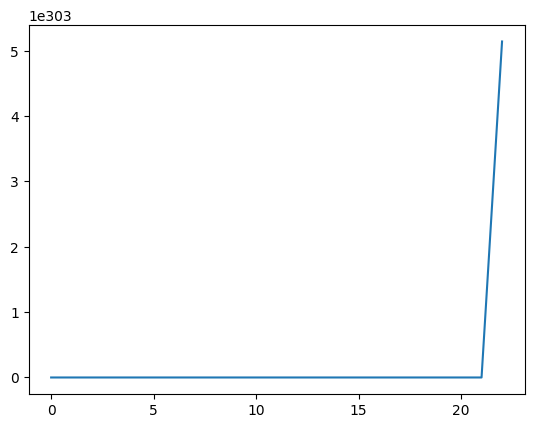

In [ ]:
plt.plot(standard_y_val, label='Standard')

In [ ]:
ss = 0.01
y_rand = np.zeros(len(y_test))

rand_y_val = []

def random_gradient_desc():
  stop_condition = False
  while True:
    if (stop_condition):
      break
    rand_y_val.append(solve_function(y_rand))
    for i in range(len(X_test)):
      rand_block = np.random.randint(len(y_test))
      grad = gradient_calc(y_rand, rand_block)
      if abs(grad) < 0.00001:
        stop_condition = True
      y_rand[rand_block] -= ss*grad
  return result_y(y_rand)

In [ ]:
# Call the function and calculate the CPU time
%%time 
y_gradient = random_gradient_desc()

CPU times: user 1min 9s, sys: 211 ms, total: 1min 9s
Wall time: 1min 16s


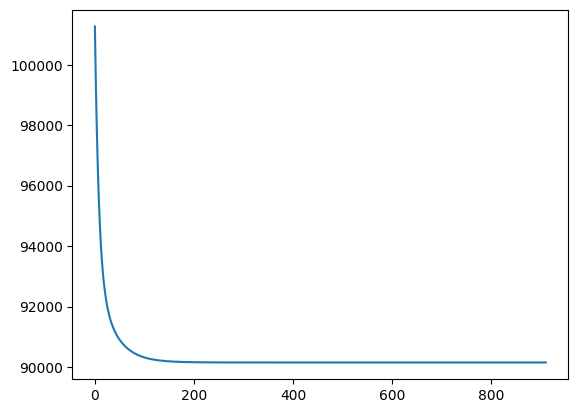

In [ ]:
plt.plot(rand_y_val, label='Random')

In [ ]:
ss = 0.01
y_gs = np.zeros(len(y_test))

gs_y_val = []

def gs_gradient_desc():
  stop_condition = False
  while True:
    if (stop_condition):
      break
    gs_y_val.append(solve_function(y_gs))
    for i in range(len(X_test)):
      gs = np.argmax(y_gs)
      grad = gradient_calc(y_gs, gs)
      if abs(grad) < 0.00001:
        stop_condition = True
      y_gs[gs] -= ss*grad
  return result_y(y_gs)

In [ ]:
%%time 
y = gs_gradient_desc()

CPU times: user 65.6 ms, sys: 0 ns, total: 65.6 ms
Wall time: 66.1 ms


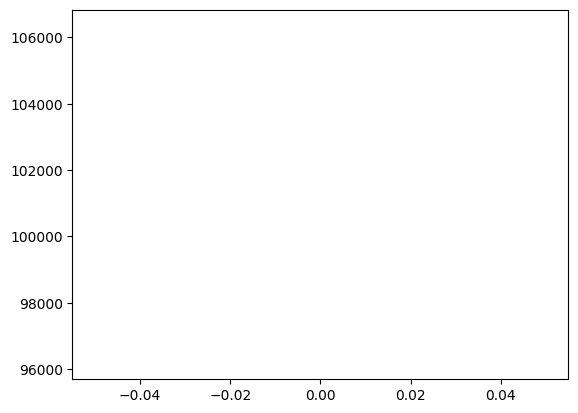

In [ ]:
plt.plot(gs_y_val, label='GS')